In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
import pandas as pd
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 6)
pd.set_option('precision', 1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
import pandas as pd
%matplotlib inline

tableau = pd.read_csv("./data/base-pop-2015-communes.csv")
print(tableau.shape)

(35399, 109)


In [3]:
print("Toutes les données : ",tableau.shape)
print("Sans les valeurs manquantes : ",tableau.dropna().shape)

Toutes les données :  (35399, 109)
Sans les valeurs manquantes :  (35399, 109)


In [4]:
colonnes = [ "CODGEO", "REG","DEP", "LIBGEO", "P15_POP",
    "P15_POPF","P15_POP7589","P15_POP90P","C15_POP15P_CS6"]
donnees = tableau[colonnes]
donnees[0:5]

,CODGEO,REG,DEP,...,P15_POP7589,P15_POP90P,C15_POP15P_CS6
0,1001,84,1,...,53.00,5.00,125.00
1,1002,84,1,...,16.86,1.98,9.92
2,1004,84,1,...,1059.01,149.63,1800.54
3,1005,84,1,...,99.00,10.00,230.00
4,1006,84,1,...,9.91,0.99,14.86


In [5]:
type(donnees.loc[10,"P15_POP"])

numpy.float64

In [6]:
def calcul_prop_f(ligne):
    if (ligne["P15_POP"] == None) or (ligne["P15_POP"] == 0):
        return None
    proportion = 100*ligne["P15_POPF"]/ligne["P15_POP"]
    return round(proportion,1)

In [7]:
donnees["prop_f"] = donnees.apply(calcul_prop_f, axis=1)
donnees.head()

,CODGEO,REG,DEP,...,P15_POP90P,C15_POP15P_CS6,prop_f
0,1001,84,1,...,5.00,125.00,48.90
1,1002,84,1,...,1.98,9.92,49.40
2,1004,84,1,...,149.63,1800.54,51.70
3,1005,84,1,...,10.00,230.00,49.60
4,1006,84,1,...,0.99,14.86,43.60


In [8]:
# deactivate history to not crash when poking at prompt number.
ip = get_ipython()
ip.history_manager.enabled = False

def calcul_prop_ouvriers(ligne):
    if (ligne["P15_POP"] == None) or (ligne["P15_POP"] == 0):
        return None
    return round(100*ligne["C15_POP15P_CS6"]/ligne["P15_POP"],1)
    
donnees["prop_ouvriers"] = donnees.apply(calcul_prop_ouvriers,axis=1)
def calcul_prop_sup75(ligne):
    if (ligne["P15_POP"] == None) or (ligne["P15_POP"] == 0):
        return None
    plus_75ans = ligne["P15_POP7589"]+ligne["P15_POP90P"]
    return round(100*plus_75ans/ligne["P15_POP"],1)

donnees["prop_sup75"] = donnees.apply(calcul_prop_sup75,axis=1)

In [9]:
total_pop = donnees["P15_POP"].sum()
total_f = donnees["P15_POPF"].sum()
prop_f_nat = 100*total_f/total_pop
print(round(prop_f_nat,2))

51.6


In [10]:
def reco_prop_f(proportion):
    if proportion > prop_f_nat+1:
        return "Supérieur"
    if proportion < prop_f_nat-1:
        return "Inférieur"
    return "Similaire"

donnees["prop_cat"] = donnees["prop_f"].apply(reco_prop_f)

In [11]:

q = [0,1000,10000,100000,10000000]
donnees["P15_POP_C"] = pd.cut(donnees["P15_POP"], q)
donnees["P15_POP_C"].head()

0          (0, 1000]
1          (0, 1000]
2    (10000, 100000]
3      (1000, 10000]
4          (0, 1000]
Name: P15_POP_C, dtype: category
Categories (4, interval[int64]): [(0, 1000] < (1000, 10000] < (10000, 100000] < (100000, 10000000]]

In [12]:
donnees["prop_cat"].value_counts()

Inférieur    20517
Similaire    10508
Supérieur     4374
Name: prop_cat, dtype: int64

In [13]:
donnees["prop_cat"].value_counts(normalize=True)

Inférieur   0.58
Similaire   0.30
Supérieur   0.12
Name: prop_cat, dtype: float64

In [14]:
donnees["prop_f_ab"] = donnees["prop_f"].fillna("Absent")

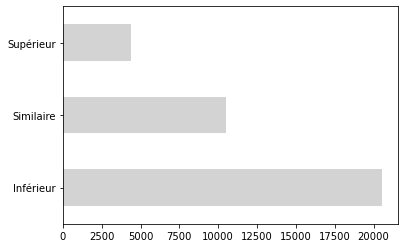

In [15]:
comptage = donnees["prop_cat"].value_counts()
ax = comptage.plot(kind="barh", color="lightgray")

In [16]:
donnees["P15_POP"].mean()

1869.8347410943811

In [17]:
donnees["P15_POP"].median()

450.0

In [18]:
donnees["P15_POP"].mode()

0   107.00
dtype: float64

In [19]:
donnees["P15_POP"].std()

15028.28010700149

In [20]:
donnees["P15_POP"].quantile([0,0.25,0.5,0.75,1])

0.00         0.00
0.25       198.00
0.50       450.00
0.75      1131.00
1.00   2206488.00
Name: P15_POP, dtype: float64

In [21]:
q = [0,0.25,0.5,0.75,1]
l = ["Q1","Q2","Q3","Q4"]

donnees["P15_POP_C"]=pd.qcut(donnees["P15_POP"],q,l)
donnees["prop_f_C"]=pd.qcut(donnees["prop_f"],q,l)
donnees["prop_sup75_C"]=pd.qcut(donnees["prop_sup75"],q,l)
donnees["prop_ouvriers_C"]=pd.qcut(donnees["prop_ouvriers"],q,l)

donnees.to_csv("./data/data-chap6.csv")

In [22]:
Q = donnees["P15_POP"].quantile([0.25,0.75])
print(Q[0.75]-Q[0.25])

933.0


In [23]:
donnees["P15_POP"].describe()

count     35399.00
mean       1869.83
std       15028.28
min           0.00
25%         198.00
50%         450.00
75%        1131.00
max     2206488.00
Name: P15_POP, dtype: float64

In [24]:
# Définition de la fonction
def identifie_outliers(valeur, nb_std, m, std):
    distance = abs(valeur-m)/std
    if distance > nb_std :
        return True
    return False

# Calcul des indicateurs
moyenne = donnees["P15_POP"].mean()
ecarttype = donnees["P15_POP"].std()

# Identification des outliers
outliers = donnees["P15_POP"].apply(identifie_outliers,
        args = (10,moyenne,ecarttype))
outliers.value_counts()

False    35382
True        17
Name: P15_POP, dtype: int64

In [25]:
pd.crosstab(donnees["prop_f_C"], donnees["prop_sup75_C"])

prop_sup75_C,Q1,Q2,Q3,Q4
prop_f_C,,,,
Q1,2649,2064,2146,2055
Q2,2943,2423,2070,1542
Q3,2359,2515,2390,1655
Q4,1207,1567,2305,3503


In [26]:
tab = pd.crosstab(donnees["prop_f_C"],
                  donnees["prop_sup75_C"],
                  normalize='columns',
                  margins=True)
round(100*tab,2)

prop_sup75_C,Q1,Q2,Q3,Q4,All
prop_f_C,,,,,
Q1,28.93,24.09,24.08,23.47,25.19
Q2,32.14,28.28,23.23,17.61,25.37
Q3,25.76,29.35,26.82,18.90,25.20
Q4,13.18,18.29,25.87,40.01,24.25


In [27]:
tab3 = pd.crosstab([donnees["prop_sup75_C"],
                    donnees["prop_ouvriers_C"]],
                donnees["prop_f_C"],
                rownames=["prop vieux","prop ouvriers"],
                colnames=["prop femmes"])
tab3

prop femmes                Q1   Q2   Q3    Q4
prop vieux prop ouvriers                     
Q1         Q1             588  638  583   380
           Q2             507  794  698   292
           Q3             635  813  616   255
           Q4             919  698  462   280
Q2         Q1             402  423  556   458
           Q2             413  564  692   398
           Q3             502  703  703   400
           Q4             747  733  564   311
Q3         Q1             511  384  501   658
           Q2             429  447  619   649
           Q3             505  585  687   600
           Q4             701  654  583   398
Q4         Q1             779  519  514  1210
           Q2             395  330  410   990
           Q3             379  346  424   867
           Q4             502  347  307   436

In [28]:
from scipy.stats import pearsonr

variable1 = list(donnees["prop_sup75"].dropna())
variable2 = list(donnees["prop_ouvriers"].dropna())
round(pearsonr(variable1,variable2)[0],2)

-0.13

In [29]:
donnees[["prop_sup75","prop_ouvriers","prop_f"]].corr()

,prop_sup75,prop_ouvriers,prop_f
prop_sup75,1.00,-0.13,0.16
prop_ouvriers,-0.13,1.00,-0.11
prop_f,0.16,-0.11,1.00


In [30]:
donnees.groupby("prop_f_C")["P15_POP"].mean()

prop_f_C
Q1    382.62
Q2    886.30
Q3   1961.62
Q4   4349.42
Name: P15_POP, dtype: float64

In [31]:
donnees.groupby("prop_f_C")["P15_POP"].agg(["median","mean"])

,median,mean
prop_f_C,,
Q1,226.00,382.62
Q2,500.00,886.30
Q3,720.00,1961.62
Q4,673.00,4349.42


In [32]:
m = donnees["prop_f"].mean()
et = donnees["prop_f"].std()
print("Moyenne : {:0.2} [{:0.2}]".format(m, et))

Moyenne : 5e+01 [2.7]


In [33]:
from scipy.stats import normaltest
test = normaltest(donnees["prop_f"].dropna())
print("La p-value du test est {:e}".format(test[1]))

La p-value du test est 0.000000e+00


In [34]:
echantillon = donnees["prop_f"].sample(frac=0.01)
m = echantillon.mean()
et = echantillon.std()
print("Moyenne : {:0.2} [{:e}]".format(m, et))

Moyenne : 5e+01 [2.523860e+00]


In [35]:
from scipy.stats import sem, norm
m = echantillon.mean()
es = sem(echantillon)
intervalle = norm.interval(0.95, loc=m, scale=es)
print(intervalle[0],intervalle[1])

49.59782164891687 50.123647277636785


In [36]:
from scipy.stats import chi2_contingency
tableau_croise = pd.crosstab(donnees["prop_f_C"], 
                    donnees["prop_sup75_C"])
chi2 = chi2_contingency(tableau_croise)
print(round(chi2[0],1), chi2[1])

2188.9 0.0


In [37]:
tableau_croise - chi2[3]

prop_sup75_C,Q1,Q2,Q3,Q4
prop_f_C,,,,
Q1,342.49,-94.17,-98.30,-150.01
Q2,619.93,249.34,-190.42,-678.85
Q3,51.19,355.62,144.44,-551.25
Q4,-1013.61,-510.79,144.28,1380.11


In [38]:
import researchpy
tableau = researchpy.crosstab(donnees["prop_f_C"], 
        donnees["prop_sup75_C"], test= "chi-square")
tableau[1]

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,2188.87
1,p-value =,0.00
2,Cramer's V =,0.14


In [39]:
from scipy.stats import ttest_ind

med = donnees["P15_POP"].median()
pv = donnees[donnees["P15_POP"] < med]["prop_sup75"].dropna()
gv = donnees[donnees["P15_POP"] >= med]["prop_sup75"].dropna()

print("Moyenne groupe 1 : {}\nMoyenne groupe 2 : {}".\
        format(round(pv.mean(),2),round(gv.mean(),2)))

test = ttest_ind(pv,gv)
print("La p-value du test est {:e}".format(test[1]))

Moyenne groupe 1 : 10.4
Moyenne groupe 2 : 9.44
La p-value du test est 1.587731e-82


In [40]:
from scipy.stats import ranksums

Q3 = donnees[donnees["P15_POP_C"]=="Q3"]["prop_sup75"].dropna()
Q4 = donnees[donnees["P15_POP_C"]=="Q4"]["prop_sup75"].dropna()
test = ranksums(Q3,Q4)
print("La p-value est {:e}".format(test[1]))

La p-value est 1.387835e-43
